In [1]:
import obspy
import numpy as np
import scipy as sp

st = obspy.read("data/20101201.014700.A.SEED")

BHE_st = obspy.core.stream.Stream()
for i in range(len(st)):
    if st[i].stats['channel'] == 'BHE':
        BHE_st.append(st[i]) 

In [2]:
BHE_st

11 Trace(s) in Stream:
CN.VLDQ..BHE | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.SADO..BHE | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.GAC..BHE  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.KGNO..BHE | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.KAPO..BHE | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.LONY..BHE | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.MNTQ..BHE | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.FRNY..BHE | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.NCB..BHE  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.ERPA..BHE | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 sampl

In [3]:
import matplotlib.pylab as plt
from __future__ import print_function
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

<IPython.core.display.Javascript object>


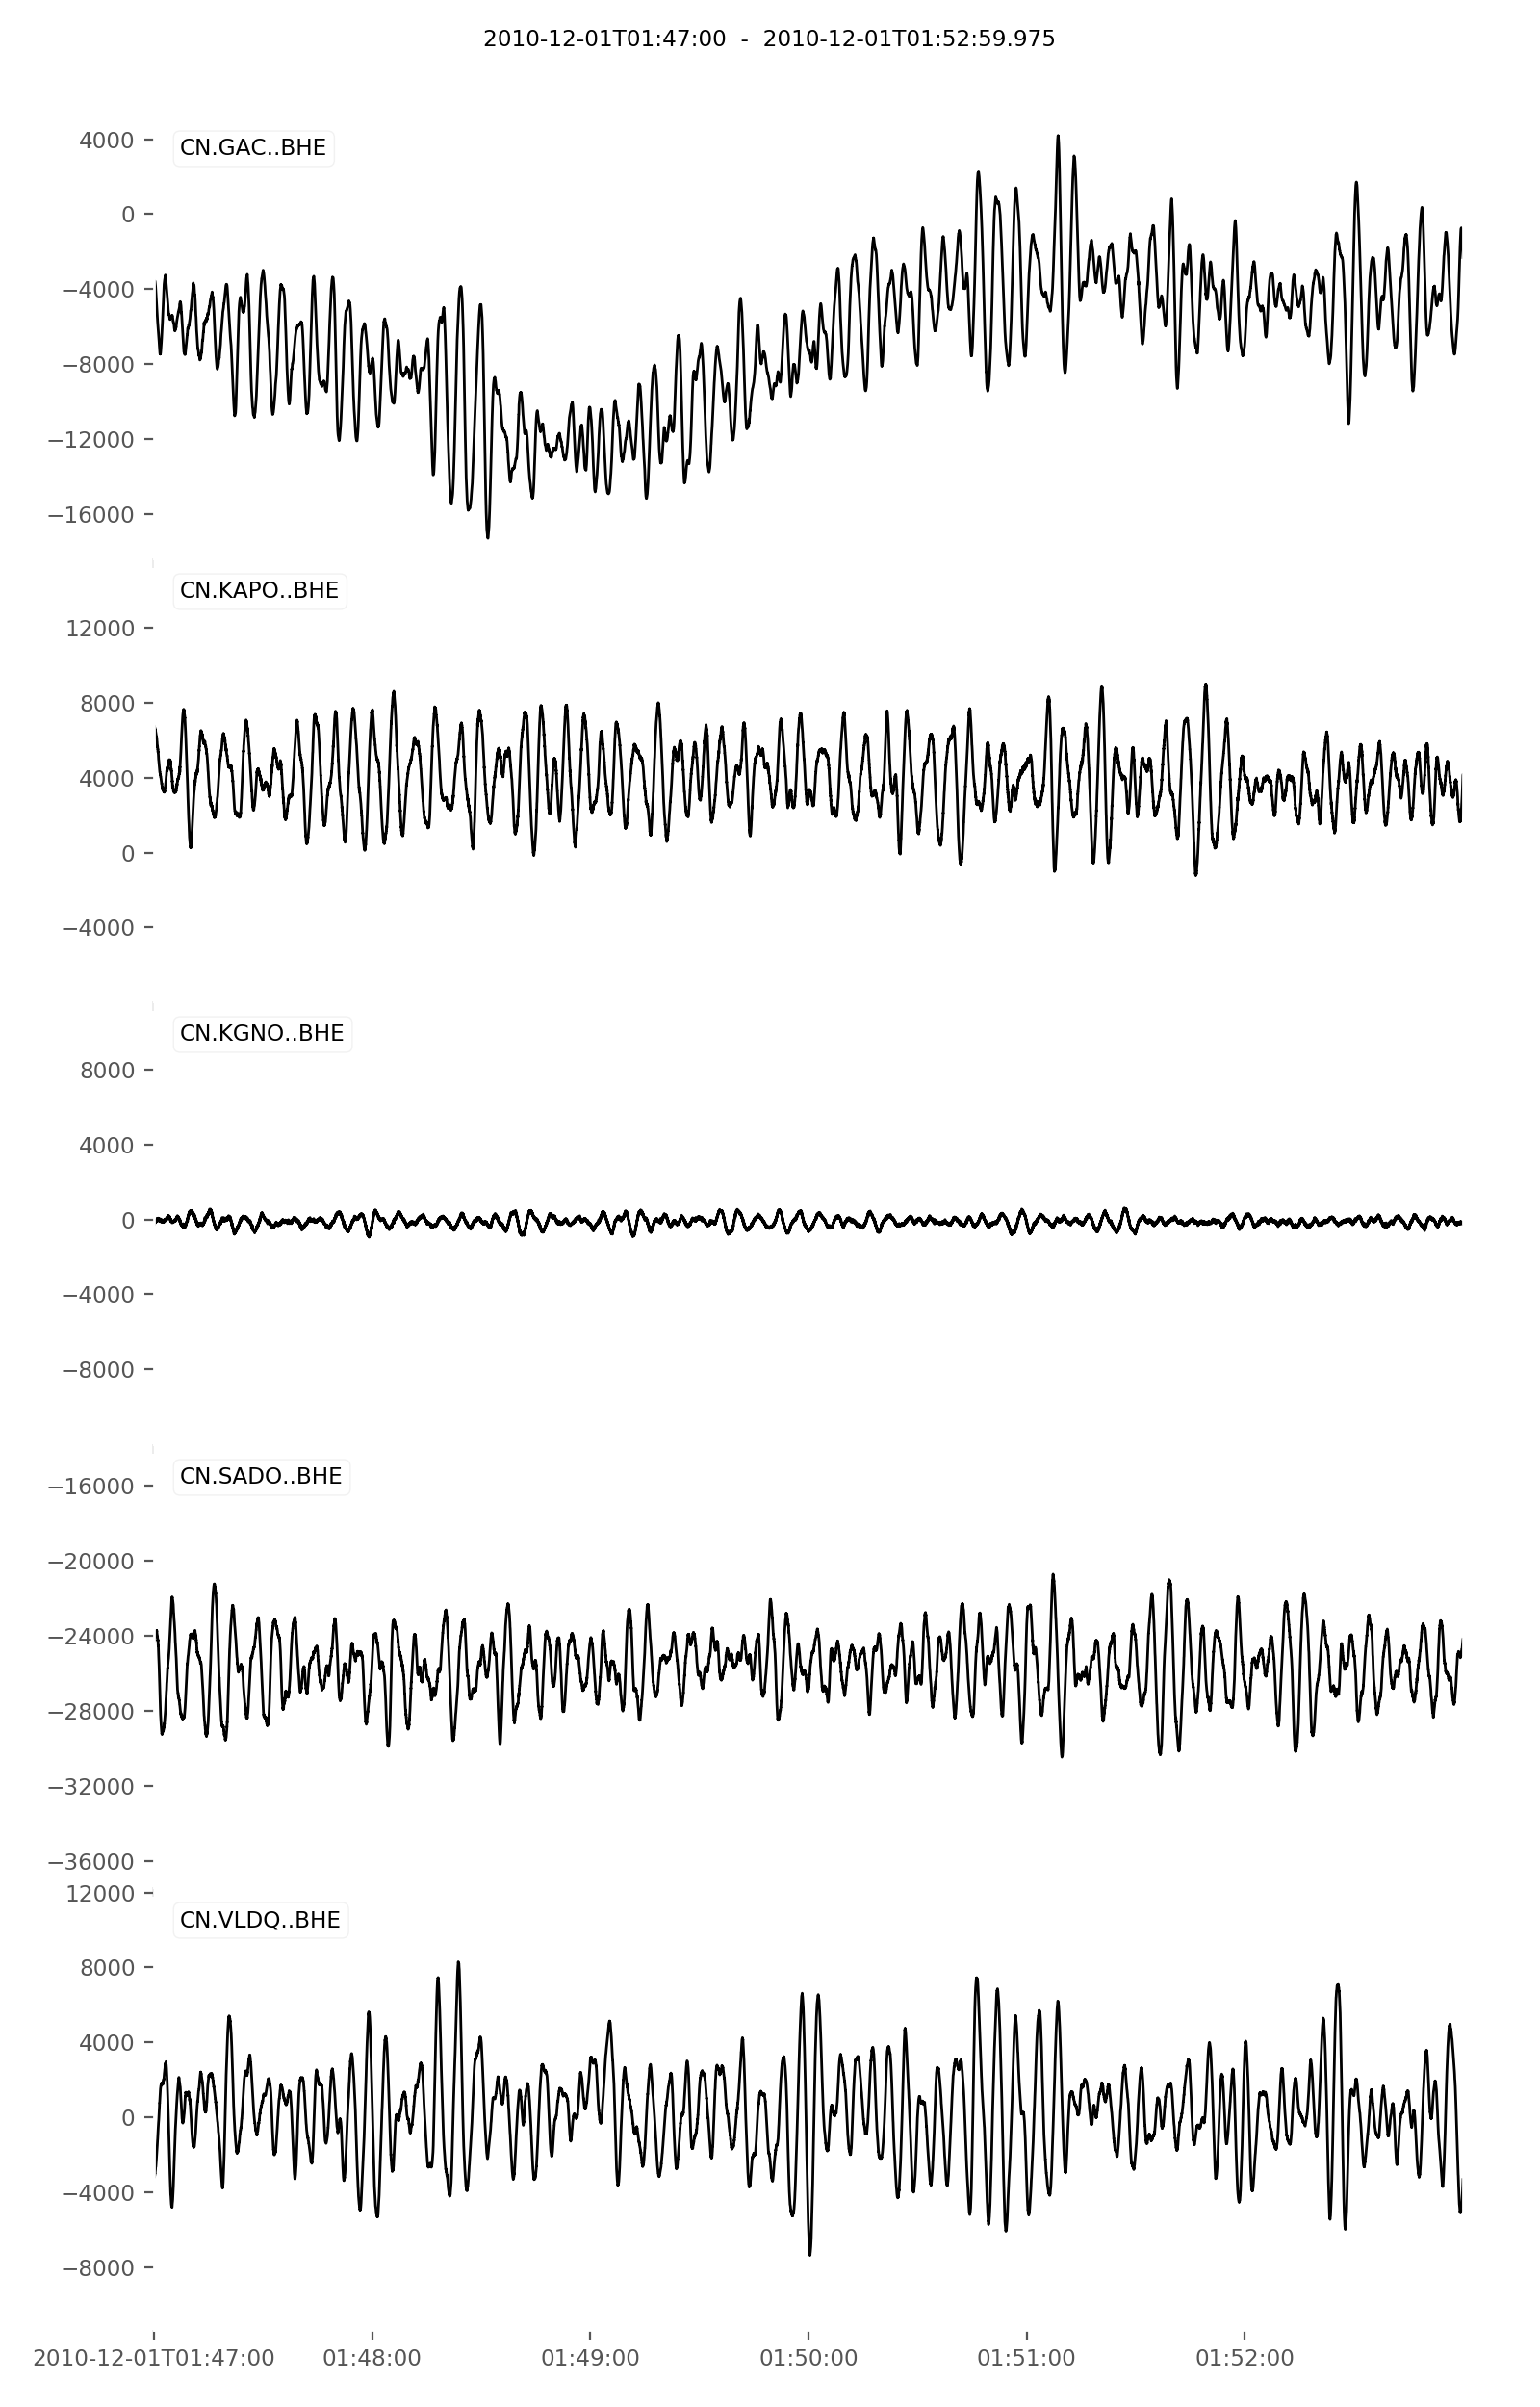

In [5]:
BHE_st[:5].plot()

In [7]:
print("Station: ", [tr.stats['station'] for tr in BHE_st])
print("Sampling Rate: ", [tr.stats['sampling_rate'] for tr in BHE_st])
print("(delta, npts): ", [(tr.stats['delta'], tr.stats['npts']) for tr in BHE_st])
print("(start time, end time): ", np.array([(tr.stats['starttime'], tr.stats['endtime']) for tr in BHE_st]))

Station:  ['VLDQ', 'SADO', 'GAC', 'KGNO', 'KAPO', 'LONY', 'MNTQ', 'FRNY', 'NCB', 'ERPA', 'BINY']
Sampling Rate:  [40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
(delta, npts):  [(0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400)]
(start time, end time):  [[UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
 

In [10]:
BHE_stats = [(np.mean(tr.data), np.std(tr.data), (min(tr.data), max(tr.data))) for tr in BHE_st]
print("Mean\t\t\tStandard Deviation\tmin/max")
for s in BHE_stats:
    print(s[0], "\t\t", s[1], "\t\t", (s[2][0], s[2][1]))

Mean			Standard Deviation	min/max
318.285833333 		 2425.27638871 		 (-7363, 8305)
-25620.3924306 		 1672.17935557 		 (-30473, -20704)
-6620.18326389 		 3699.873671 		 (-17295, 4192)
-113.970347222 		 245.745370186 		 (-945, 600)
3971.25361111 		 1809.34639883 		 (-1230, 8992)
665.276041667 		 577.248890676 		 (-1319, 2251)
-662.013611111 		 646.977859258 		 (-3584, 2329)
909.943125 		 248.332397428 		 (88, 1580)
20781.9836806 		 455.621793783 		 (19211, 22137)
796.177638889 		 296.183235749 		 (-120, 2252)
116.994652778 		 1226.08022255 		 (-3619, 2228)


In [11]:
around0 = obspy.core.stream.Stream()
notaround0 = obspy.core.stream.Stream()
for tr in BHE_st:
    if (abs(np.mean(tr.data))-np.std(tr.data)) < 0:
        around0.append(tr)
    else:
        notaround0.append(tr)
print(len(around0))
print(len(notaround0))

3
8


<IPython.core.display.Javascript object>


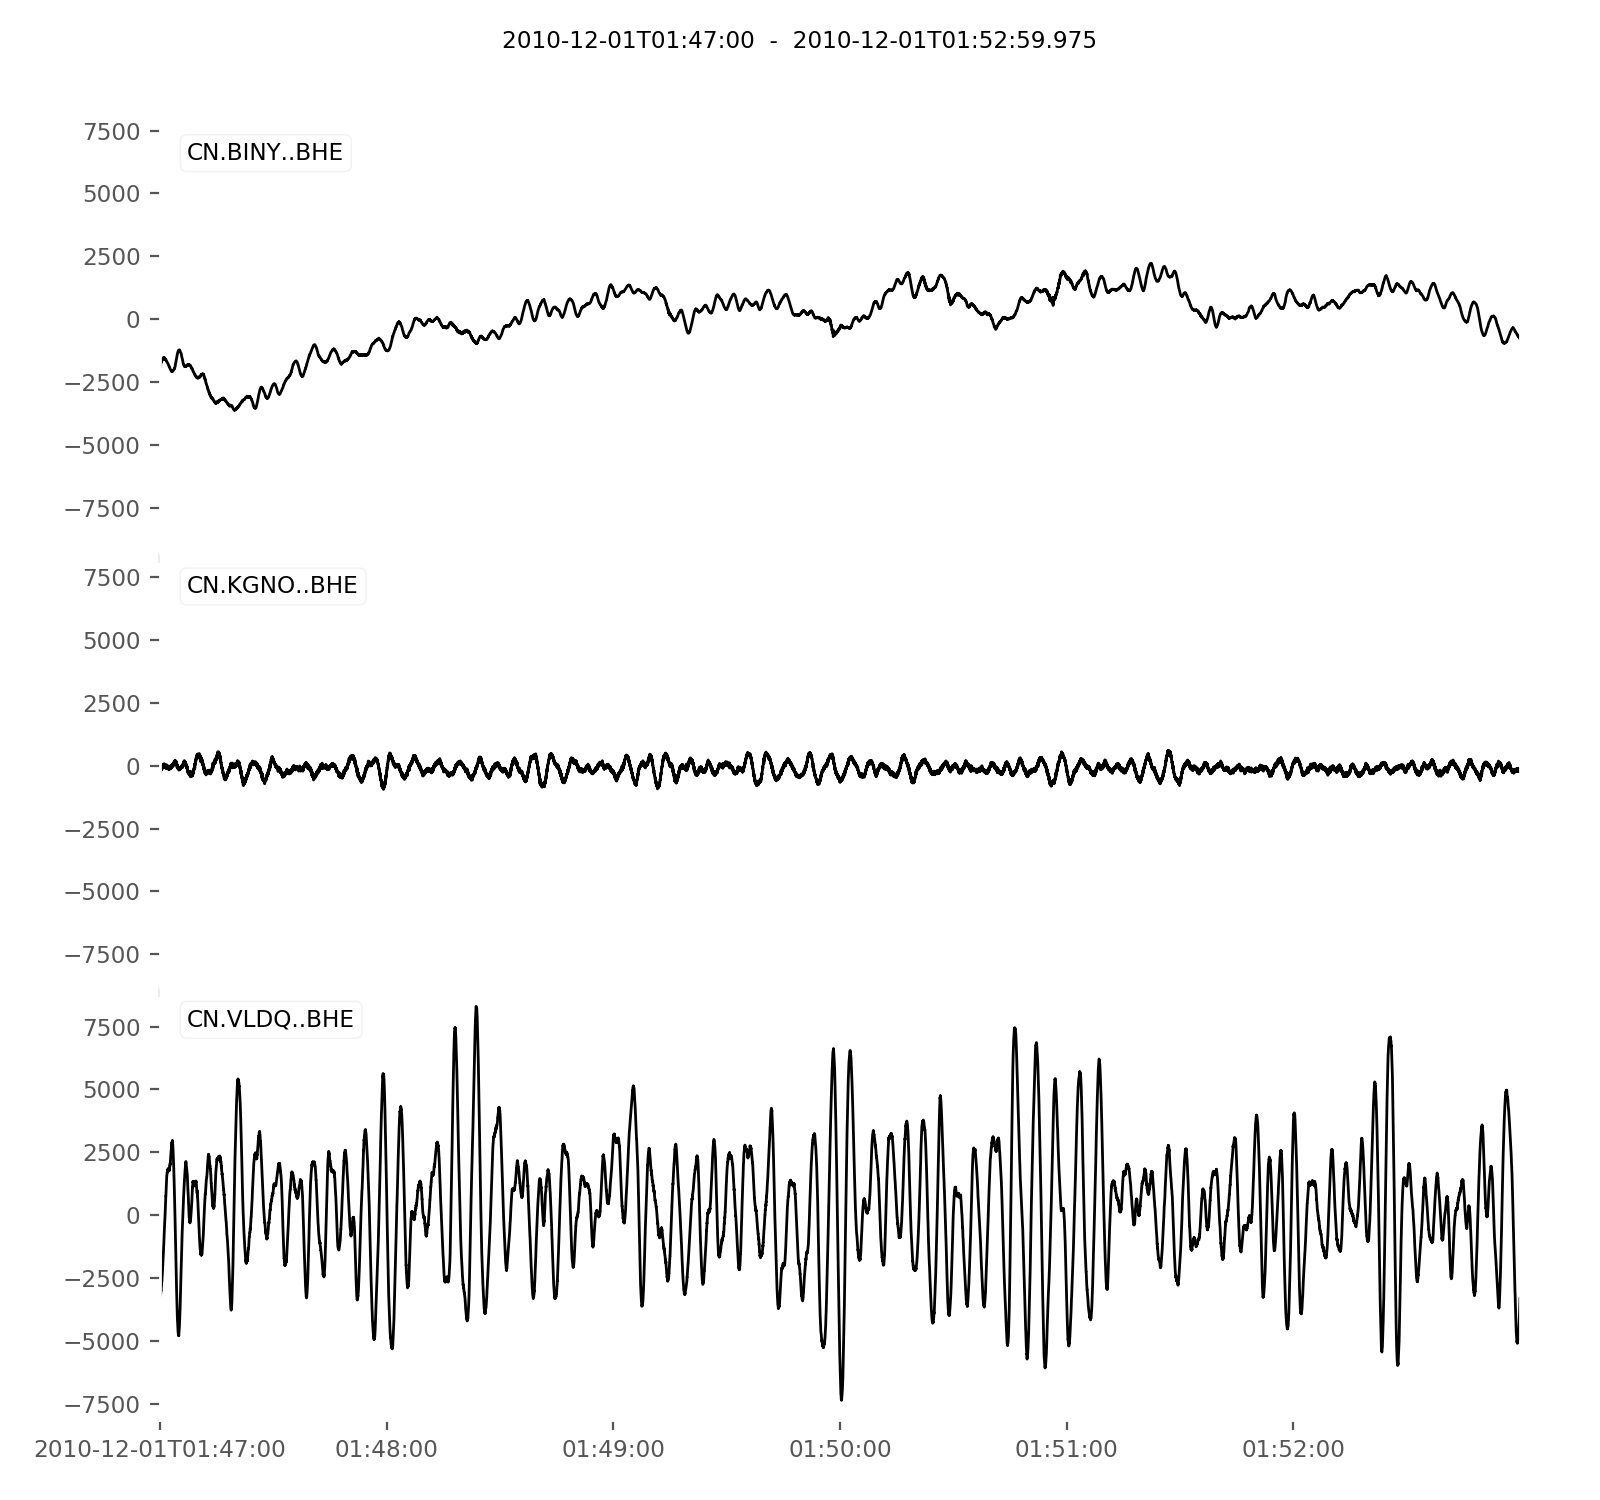

In [12]:
around0[:].plot()

<IPython.core.display.Javascript object>


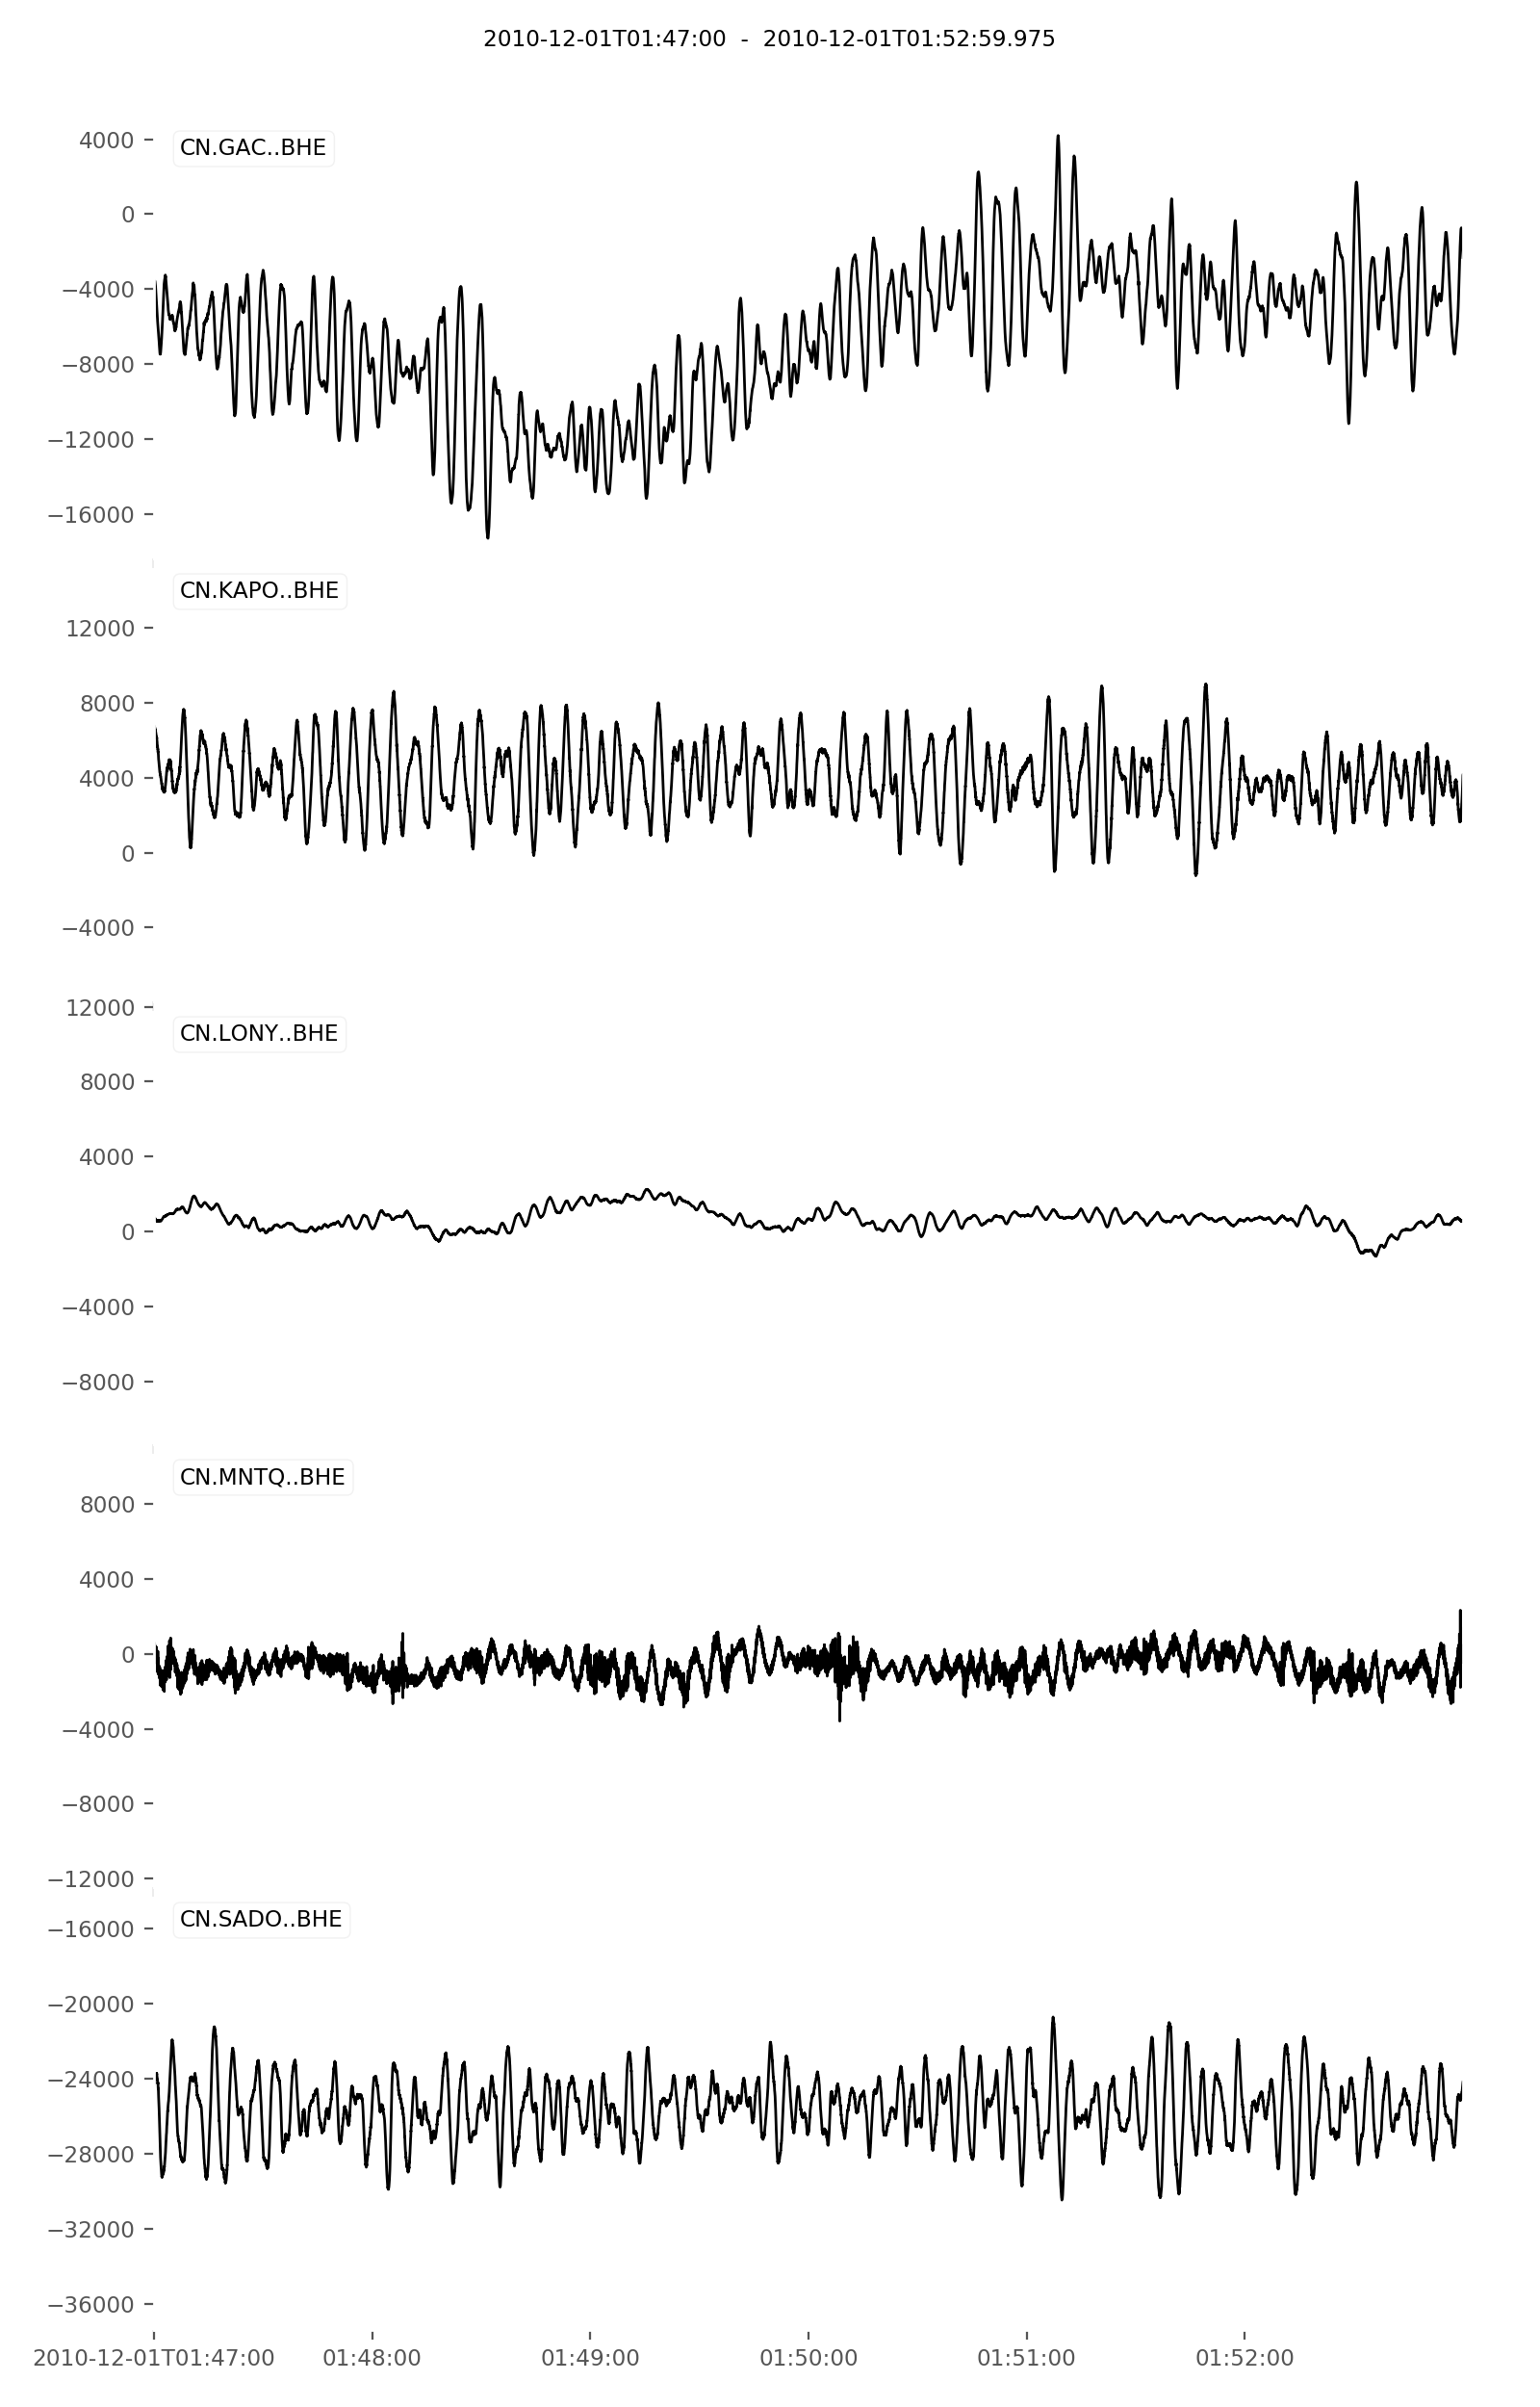

In [13]:
notaround0[:5].plot()